Filtering annotated variants to extract small variants for ML

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from tqdm import tqdm 
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.chdir( '/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/')

In [2]:
# Function to open and load config file for filtering columns and rows
def get_col_configs(config_f):
    with open(config_f) as fh:
        config_dict = yaml.safe_load(fh)

    # print(config_dict)
    return config_dict


In [144]:
# Load the config file as dictionary
config_f = "../configs/col_config.yaml"
config_dict = get_col_configs(config_f)

In [4]:
config_dict["raw_cols"]

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'DExTR_Adipose_Tissue',
 'DExTR_Muscle',
 'DExTR_Blood_Vessel',
 'DExTR_Heart',
 'DExTR_Uterus',
 'DExTR_Vagina',
 'DExTR_Breast',
 'DExTR_Skin',
 'DExTR_Salivary_Gland',
 'DExTR_Brain',
 'DExTR_Adrenal_Gland',
 'DExTR_Thyroid',
 'DExTR_Lung',
 'DExTR_Spleen',
 'DExTR_Pancreas',
 'DExTR_Esophagus',
 'DExTR_Stomach',
 'DExTR_Colon',
 'DExTR_Small_Intestine',
 'DExTR_Prostate',
 'DExTR_Testis',
 'DExTR_Nerve',
 'DExTR_Blood',
 'DExTR_Pituitary',
 'DExTR_Ovary',
 'DExTR_Liver',
 'DExTR_Kidney',
 'DExTR_Cervix_Uteri',
 'DExTR_Fallopian_Tube',
 'DExTR_Bladder',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'aloft.affect',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd_exome.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.clinical_a_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inherita

In [5]:
#print('Loading data...')
#df = pd.read_csv("./interim/clinvar_parsed.csv.gz", usecols=config_dict["display_cols"], low_memory=False)
#print('Data Loaded !....')

In [6]:
print('Loading data...')
df = pd.read_csv("./interim/clinvar_6623_parsed.csv.gz", low_memory=False) #, usecols=config_dict["raw_cols"]
print('Data Loaded !....')


Loading data...
Data Loaded !....


In [7]:
df.columns.to_list()

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'extra_vcf_info.CLNDN',
 'extra_vcf_info.CLNREVSTAT',
 'extra_vcf_info.CLNSIG',
 'extra_vcf_info.CLNSIGCONF',
 'aloft.affect',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.molecular_profile_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inheritance',
 'cancer_genome_interpreter.resistant',
 'cancer_genome_interpreter.responsive',
 'cancer_genome_interpreter.other',
 'ccre_screen._group',
 'ccre_screen.bound',
 'clingen.disease',
 'clingen.classification',
 'clinpred.score',
 'clinvar.sig',
 'clinvar.id',
 'clinvar.rev_stat',
 'clinvar.sig_conf',
 'dann.score',
 'dann_coding.dann_coding_score',
 'dgi.interaction',
 'dgi.score',
 'ensembl_regulatory_build.region',
 'ess_gene.indispensabilit

In [8]:
#df = df[config_dict["raw_cols"]]

In [17]:
df.shape

(12973645, 132)

In [18]:
# Number of variants that we started with
df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape

(2177684, 4)

In [9]:
#df = df.replace(['.','-'], np.nan)

In [10]:
df['so'] = df['consequence']

In [11]:
df.dtypes

transcript                                  object
gene                                        object
consequence                                 object
protein_hgvs                                object
cdna_hgvs                                   object
chrom                                       object
pos                                          int64
ref_base                                    object
alt_base                                    object
coding                                      object
extra_vcf_info.CLNDN                        object
extra_vcf_info.CLNREVSTAT                   object
extra_vcf_info.CLNSIG                       object
extra_vcf_info.CLNSIGCONF                   object
aloft.affect                                object
aloft.tolerant                             float64
aloft.recessive                            float64
aloft.dominant                             float64
aloft.pred                                  object
aloft.conf                     

In [12]:
#df['fathmm.fathmm_score'].unique()
df["fathmm.fathmm_score"] = df["fathmm.fathmm_score"].replace(['.'], np.nan)
df["fathmm.fathmm_score"] = pd.to_numeric(df["fathmm.fathmm_score"])

In [13]:
original = df.copy()

In [51]:
df = original.copy()

In [52]:
#Drop variants with leass than 30% of data along with duplicates. Also delete columns with all null values.
print('Dropping empty columns and rows along with duplicate rows...')
#df.dropna(axis=1, thresh=(df.shape[0]*0.15), inplace=True)  #thresh=(df.shape[0]/4)
df.dropna(axis=0, thresh=(df.shape[1]*0.3), inplace=True)  #thresh=(df.shape[1]*0.3),   how='all',
df.drop_duplicates()
df.dropna(axis=1, how='all', inplace=True)  #thresh=(df.shape[0]/4)
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nclinvar_CLNSIG:\n', df['extra_vcf_info.CLNSIG'].value_counts())
print('\nclinvar_review:\n', df['extra_vcf_info.CLNREVSTAT'].value_counts())
print('\nclinvar_confidence:\n', df['extra_vcf_info.CLNSIGCONF'].value_counts())
print('\nclingen_classification:\n', df['clingen.classification'].value_counts())

Dropping empty columns and rows along with duplicate rows...

Variant-transcript pairs shape = (11153639, 132)

Variants shape = (2137714, 4)

clinvar_CLNSIG:
 Uncertain_significance                                                  5501617
Likely_benign                                                           2728544
Benign                                                                   817285
Conflicting_interpretations_of_pathogenicity                             670871
Pathogenic                                                               642776
Likely_pathogenic                                                        370968
Benign/Likely_benign                                                     207316
Pathogenic/Likely_pathogenic                                             108214
not_provided                                                              77513
drug_response                                                             11509
other                                   

In [53]:
df= df.loc[df['extra_vcf_info.CLNSIG'].isin(config_dict['train_ClinicalSignificance'])]
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (11047591, 132)

Variants shape = (2122117, 4)


In [54]:
df['extra_vcf_info.CLNSIG'].unique()

array(['Likely_benign', 'Uncertain_significance', 'Benign',
       'Conflicting_interpretations_of_pathogenicity', 'Pathogenic',
       'Likely_pathogenic', 'Benign/Likely_benign',
       'Pathogenic/Likely_pathogenic'], dtype=object)

In [55]:
pd.pivot_table(df, values='consequence', index='so', columns='extra_vcf_info.CLNSIG',
                          aggfunc='count').sort_values(by=['Benign','Pathogenic'], ascending=False)

extra_vcf_info.CLNSIG,Benign,Benign/Likely_benign,Conflicting_interpretations_of_pathogenicity,Likely_benign,Likely_pathogenic,Pathogenic,Pathogenic/Likely_pathogenic,Uncertain_significance
so,,,,,,,,
intron_variant,362725.0,41009.0,91923.0,756372.0,17725.0,37603.0,5736.0,407206.0
synonymous_variant,109885.0,65090.0,85163.0,1134299.0,1065.0,1364.0,426.0,67647.0
missense_variant,80315.0,33923.0,224600.0,142639.0,86905.0,74138.0,25632.0,2769515.0
"intron_variant,NMD_transcript_variant",42402.0,5911.0,17076.0,99950.0,5082.0,7134.0,1697.0,92851.0
3_prime_UTR_variant,30573.0,5160.0,6730.0,25982.0,1610.0,3713.0,444.0,105404.0
"intron_variant,processed_transcript",25025.0,3550.0,9357.0,48739.0,8988.0,9919.0,2013.0,79143.0
2kb_downstream_variant,21024.0,4152.0,9240.0,38903.0,5012.0,7613.0,1685.0,126609.0
2kb_upstream_variant,20854.0,2925.0,7068.0,37942.0,3687.0,6160.0,1438.0,88889.0
"intron_variant,lnc_RNA",17970.0,8461.0,67259.0,55714.0,35200.0,20851.0,6446.0,330377.0


In [13]:
#print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))
#df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']].tail(10)

In [14]:
#df[df['clinvar.sig_conf'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']]

In [15]:
#print(len(df[df['clinvar.sig'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']]))
#df[df['clinvar.sig'].str.contains('athogenic, low')==True][['clinvar.sig','clinvar.sig_conf']].head()

In [30]:
# Check if there are any categorical columns
num_cols = df._get_numeric_data().columns

list(set(df.columns) - set(num_cols))

['ref_base',
 'so',
 'aloft.conf',
 'sift.confidence',
 'cgd.inheritance',
 'mutationtaster.model',
 'dgi.interaction',
 'chrom',
 'mutationtaster.prediction',
 'coding',
 'cgc.inheritance',
 'dbsnp.rsid',
 'cdna_hgvs',
 'cgc.class',
 'omim.omim_id',
 'gene',
 'clingen.disease',
 'genehancer.feature_name',
 'gtex.gtex_tissue',
 'clinvar.sig_conf',
 'clingen.classification',
 'clinvar.rev_stat',
 'extra_vcf_info.CLNREVSTAT',
 'aloft.pred',
 'ccre_screen.bound',
 'prec.stat',
 'alt_base',
 'extra_vcf_info.CLNDN',
 'uniprot.acc',
 'aloft.affect',
 'extra_vcf_info.CLNSIG',
 'protein_hgvs',
 'clinvar.sig',
 'ccre_screen._group',
 'extra_vcf_info.CLNSIGCONF',
 'ensembl_regulatory_build.region',
 'transcript',
 'consequence',
 'repeat.repeatclass',
 'exac_gene.exac_cnv_flag']

In [31]:
len(list(set(df.columns) - set(num_cols)))

40

In [32]:
df[list(set(df.columns) - set(num_cols))].head()

,ref_base,so,aloft.conf,sift.confidence,cgd.inheritance,mutationtaster.model,dgi.interaction,chrom,mutationtaster.prediction,coding,...,extra_vcf_info.CLNSIG,protein_hgvs,clinvar.sig,ccre_screen._group,extra_vcf_info.CLNSIGCONF,ensembl_regulatory_build.region,transcript,consequence,repeat.repeatclass,exac_gene.exac_cnv_flag
0,A,missense_variant,NaN,High,NaN,simple_aae,NaN,chr1,Polymorphism,Yes,...,Likely_benign,p.Glu15Gly,NaN,NaN,NaN,NaN,ENST00000335137,missense_variant,NaN,NaN
1,A,missense_variant,NaN,NaN,NaN,simple_aae,NaN,chr1,Polymorphism,Yes,...,Likely_benign,p.Glu36Gly,NaN,NaN,NaN,NaN,ENST00000641515,missense_variant,NaN,NaN
2,C,missense_variant,NaN,High,NaN,simple_aae,NaN,chr1,Polymorphism,Yes,...,Uncertain_significance,p.Pro164Arg,NaN,NaN,NaN,NaN,ENST00000335137,missense_variant,NaN,NaN
3,C,missense_variant,NaN,NaN,NaN,simple_aae,NaN,chr1,Polymorphism,Yes,...,Uncertain_significance,p.Pro185Arg,NaN,NaN,NaN,NaN,ENST00000641515,missense_variant,NaN,NaN
4,G,missense_variant,NaN,High,NaN,simple_aae,NaN,chr1,Polymorphism,Yes,...,Uncertain_significance,p.Val198Met,NaN,NaN,NaN,NaN,ENST00000335137,missense_variant,NaN,NaN


In [20]:
#df[df['fathmm.fathmm_score'].str.contains('&') == True]['fathmm.fathmm_score']

In [56]:
df = df.drop(['clinvar.sig','clinvar.id','clinvar.rev_stat','clinvar.sig_conf'], axis=1)

In [57]:
df['exac_gene.exac_cnv_flag'].value_counts()

N    8520543
Y     802462
Name: exac_gene.exac_cnv_flag, dtype: int64

### Get data for training

In [58]:
#Filter variants for clinvar_review
df= df.loc[df['extra_vcf_info.CLNREVSTAT'].isin(config_dict['CLNREVSTAT'])]
df= df.loc[df['extra_vcf_info.CLNSIG'].isin(config_dict['train_ClinicalSignificance'])]
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nclinvar_CLNSIG:\n', df['extra_vcf_info.CLNSIG'].value_counts())
print('\nclinvar_review:\n', df['extra_vcf_info.CLNREVSTAT'].value_counts())


Variant-transcript pairs shape = (1968054, 128)

Variants shape = (329136, 4)

clinvar_CLNSIG:
 Uncertain_significance          917228
Likely_benign                   380955
Benign/Likely_benign            201484
Benign                          165653
Pathogenic                      158220
Pathogenic/Likely_pathogenic    103967
Likely_pathogenic                40547
Name: extra_vcf_info.CLNSIG, dtype: int64

clinvar_review:
 criteria_provided,_multiple_submitters,_no_conflicts    1872415
reviewed_by_expert_panel                                  95535
practice_guideline                                          104
Name: extra_vcf_info.CLNREVSTAT, dtype: int64


In [59]:
pd.pivot_table(df, values='extra_vcf_info.CLNREVSTAT', index='extra_vcf_info.CLNSIG', #columns='clinvar.sig',
                          aggfunc='count')

,extra_vcf_info.CLNREVSTAT
extra_vcf_info.CLNSIG,
Benign,165653
Benign/Likely_benign,201484
Likely_benign,380955
Likely_pathogenic,40547
Pathogenic,158220
Pathogenic/Likely_pathogenic,103967
Uncertain_significance,917228


In [60]:
#Filter variants for clinvar_review
#df= df.loc[df['clinvar.rev_stat'].isin(config_dict['CLNREVSTAT'])]
#df= df.loc[df['clinvar.sig'].isin(config_dict['ClinicalSignificance'])]
#print('\nData shape (nsSNV) =', df.shape)
#print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
#print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())

In [61]:
#print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))

In [62]:
df['class'] = ''

In [63]:
conditions = [
    #(df['clinvar.sig'] == 'Conflicting interpretations of pathogenicity') & df['clinvar.sig_conf'].str.contains('athogen'),
    (df['extra_vcf_info.CLNSIG'] == 'Likely_benign') | (df['extra_vcf_info.CLNSIG'] == 'Benign') | (df['extra_vcf_info.CLNSIG'] == 'Benign/Likely_benign'),
    (df['extra_vcf_info.CLNSIG'] == 'Likely_pathogenic') | (df['extra_vcf_info.CLNSIG'] == 'Pathogenic') | (df['extra_vcf_info.CLNSIG'] == 'Pathogenic/Likely_pathogenic'),
    
]

values = ['low_impact', 'high_impact']

df['class'] = np.select(conditions, values)
df= df.loc[df['class'].isin(['low_impact', 'high_impact'])]
print('\nVariant-transcript pairs shape =', df.shape)
print('\nVariants shape =', df[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', df['class'].value_counts())


Variant-transcript pairs shape = (1050826, 129)

Variants shape = (185135, 4)

Classes:
 low_impact     748092
high_impact    302734
Name: class, dtype: int64


In [64]:
df['class'].unique()

array(['low_impact', 'high_impact'], dtype=object)

In [65]:
df['extra_vcf_info.CLNSIG'].unique()

array(['Benign/Likely_benign', 'Benign', 'Likely_benign',
       'Pathogenic/Likely_pathogenic', 'Pathogenic', 'Likely_pathogenic'],
      dtype=object)

In [66]:
pd.pivot_table(df, values='consequence', index='so', #columns='class',
                          aggfunc='count').sort_values(by='consequence', ascending=False)

,consequence
so,
synonymous_variant,298579
intron_variant,172463
missense_variant,121597
"NMD_transcript_variant,3_prime_UTR_variant",48963
stop_gained,47297
processed_transcript,35593
"intron_variant,lnc_RNA",34800
frameshift_truncation,31773
"intron_variant,NMD_transcript_variant",28629


In [67]:
syn = df[(df['consequence'].str.contains('synonymous_variant'))]
print('\nVariant-transcript pairs shape =', syn.shape)
print('\nVariants shape =', syn[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', syn['class'].value_counts())


Variant-transcript pairs shape = (318356, 129)

Variants shape = (78365, 4)

Classes:
 low_impact     317138
high_impact      1218
Name: class, dtype: int64


In [68]:
syn = df[(df['consequence'].str.contains('missense_variant'))]
print('\nVariant-transcript pairs shape =', syn.shape)
print('\nVariants shape =', syn[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', syn['class'].value_counts())


Variant-transcript pairs shape = (132739, 129)

Variants shape = (36811, 4)

Classes:
 low_impact     78646
high_impact    54093
Name: class, dtype: int64


In [69]:
syn = df[(df['consequence'].str.contains('intron_variant'))]
print('\nVariant-transcript pairs shape =', syn.shape)
print('\nVariants shape =', syn[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)
print('\nClasses:\n', syn['class'].value_counts())


Variant-transcript pairs shape = (285138, 129)

Variants shape = (67977, 4)

Classes:
 low_impact     207443
high_impact     77695
Name: class, dtype: int64


In [70]:
syn[syn['class']=='high_impact'].head()

,transcript,gene,consequence,protein_hgvs,cdna_hgvs,chrom,pos,ref_base,alt_base,coding,...,gnomad_gene.lof_z,gnomad_gene.mis_z,gnomad_gene.syn_z,gnomad_gene.pLI,gnomad_gene.pRec,gnomad_gene.pNull,gnomad3.af,phi.phi,so,class
31572,ENST00000288774,PEX10,"intron_variant,splice_site_variant",NaN,c.972+1G>C,chr1,2406483,C,G,NaN,...,1.7882,-0.20114,0.18559,0.000347,0.95426,0.045390,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
31574,ENST00000447513,PEX10,"intron_variant,splice_site_variant",NaN,c.912+1G>C,chr1,2406483,C,G,NaN,...,1.7731,-0.24972,0.24154,0.000335,0.95228,0.047383,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
31575,ENST00000507596,PEX10,"intron_variant,splice_site_variant",NaN,c.912+1G>C,chr1,2406483,C,G,NaN,...,2.1519,-0.26686,0.30038,0.007533,0.97830,0.014167,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
32165,ENST00000288774,PEX10,"intron_variant,splice_site_variant",NaN,c.836+1G>C,chr1,2406719,C,G,NaN,...,1.7882,-0.20114,0.18559,0.000347,0.95426,0.045390,NaN,0.10434,"intron_variant,splice_site_variant",high_impact
32167,ENST00000447513,PEX10,"intron_variant,splice_site_variant",NaN,c.776+1G>C,chr1,2406719,C,G,NaN,...,1.7731,-0.24972,0.24154,0.000335,0.95228,0.047383,NaN,0.10434,"intron_variant,splice_site_variant",high_impact


In [71]:
#df[(df['consequence']=='stop_lost') & (df['class']=='low_impact')].head(50)

In [72]:
pd.pivot_table(df, values='consequence', index='so', #columns='class',
                          aggfunc='count').sort_values(by='consequence', ascending=False).to_csv('./interim/variant_by_type.csv')

In [73]:
pd.pivot_table(df, values='consequence', index='so', columns='extra_vcf_info.CLNSIG',
                          aggfunc='count').sort_values(by=['Benign','Pathogenic'], ascending=False)


extra_vcf_info.CLNSIG,Benign,Benign/Likely_benign,Likely_benign,Likely_pathogenic,Pathogenic,Pathogenic/Likely_pathogenic
so,,,,,,
intron_variant,51632.0,40249.0,59119.0,1762.0,14194.0,5507.0
synonymous_variant,35862.0,64772.0,197011.0,182.0,335.0,417.0
missense_variant,23153.0,33727.0,16070.0,9189.0,15409.0,24049.0
"intron_variant,NMD_transcript_variant",7383.0,5752.0,11369.0,684.0,1783.0,1658.0
"NMD_transcript_variant,3_prime_UTR_variant",5077.0,7736.0,19215.0,1397.0,10014.0,5524.0
processed_transcript,4949.0,6717.0,12762.0,1173.0,5611.0,4381.0
3_prime_UTR_variant,4859.0,3478.0,2759.0,180.0,493.0,432.0
"intron_variant,processed_transcript",4132.0,3445.0,4840.0,1185.0,2240.0,1945.0
"intron_variant,lnc_RNA",3805.0,8003.0,7356.0,5957.0,3651.0,6028.0


In [112]:
y = df['class']
X = df.drop(['class','aloft.affect','extra_vcf_info.CLNSIGCONF','extra_vcf_info.CLNSIG','extra_vcf_info.CLNREVSTAT','extra_vcf_info.CLNDN'], axis=1)


In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=41, test_size=0.20
)
#X_train, X_val, y_train, y_val = train_test_split(
#    X_train, y_train, stratify=y_train, random_state=41, test_size=0.20
#)

In [114]:
y_train.head()

8535536      low_impact
4242565      low_impact
4039352      low_impact
6007942      low_impact
10732003    high_impact
Name: class, dtype: object

In [115]:
print(f"Train data shape = \nVariant-transcripts: {y_train.shape}\nVariants: {X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape}\n{y_train.value_counts()}" )

print(f"\nTest data shape = \nVariant-transcripts: {y_test.shape}\nVariants: {X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape}\n{y_test.value_counts()}")


Train data shape = 
Variant-transcripts: (840660,)
Variants: (178544, 4)
low_impact     598473
high_impact    242187
Name: class, dtype: int64

Test data shape = 
Variant-transcripts: (210166,)
Variants: (178544, 4)
low_impact     149619
high_impact     60547
Name: class, dtype: int64


In [80]:

pd.pivot_table(pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
                          aggfunc='count').sort_values(by=['low_impact','high_impact'], ascending=False)

class,high_impact,low_impact
so,,
synonymous_variant,732.0,238289.0
intron_variant,17144.0,120706.0
missense_variant,39098.0,58314.0
"NMD_transcript_variant,3_prime_UTR_variant",13640.0,25441.0
"intron_variant,NMD_transcript_variant",3327.0,19574.0
processed_transcript,8880.0,19551.0
"NMD_transcript_variant,synonymous_variant",219.0,15664.0
"intron_variant,lnc_RNA",12434.0,15335.0
"intron_variant,processed_transcript",4306.0,9896.0


In [81]:
pd.pivot_table(pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
                          aggfunc='count').sort_values(by=['low_impact','high_impact'], ascending=False)


class,high_impact,low_impact
so,,
synonymous_variant,202.0,59356.0
intron_variant,4319.0,30294.0
missense_variant,9549.0,14636.0
"NMD_transcript_variant,3_prime_UTR_variant",3295.0,6587.0
"intron_variant,NMD_transcript_variant",798.0,4930.0
processed_transcript,2285.0,4877.0
"intron_variant,lnc_RNA",3202.0,3829.0
"NMD_transcript_variant,synonymous_variant",64.0,3783.0
"intron_variant,processed_transcript",1064.0,2521.0


In [52]:
#pd.pivot_table(pd.concat([X_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
#                          aggfunc='count')


In [116]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

transcript                                      0
gene                                            0
consequence                                     0
protein_hgvs                               390532
cdna_hgvs                                  108988
chrom                                           0
pos                                             0
ref_base                                        0
alt_base                                        0
coding                                     187883
aloft.tolerant                             828603
aloft.recessive                            828603
aloft.dominant                             828603
aloft.pred                                 828603
aloft.conf                                 828603
cadd.phred                                  79443
cgd.inheritance                            663181
chasmplus.score                            814848
chasmplus.pval                             814848
civic.molecular_profile_score              840123


In [117]:
print('\nVariant-transcript pairs shape =', X_train.shape)
print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (840660, 123)

Variants shape = (178544, 4)


In [118]:
X_train.dropna(axis=1, how='all', inplace=True)
print('\nVariant-transcript pairs shape =', X_train.shape)
print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (840660, 123)

Variants shape = (178544, 4)


In [119]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

transcript                                      0
gene                                            0
consequence                                     0
protein_hgvs                               390532
cdna_hgvs                                  108988
chrom                                           0
pos                                             0
ref_base                                        0
alt_base                                        0
coding                                     187883
aloft.tolerant                             828603
aloft.recessive                            828603
aloft.dominant                             828603
aloft.pred                                 828603
aloft.conf                                 828603
cadd.phred                                  79443
cgd.inheritance                            663181
chasmplus.score                            814848
chasmplus.pval                             814848
civic.molecular_profile_score              840123


In [87]:
config_dict['train_cols']

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'clingen.disease',
 'clingen.classification',
 'ncbigene.entrez',
 'omim.omim_id',
 'uniprot.acc',
 'dbsnp.rsid']

In [120]:
# Drop variant info columns so we can perform one-hot encoding
var = X_train[config_dict['train_cols']]
X_train = X_train.drop(config_dict['train_cols'], axis=1)

In [121]:
#for key in tqdm(X_train.columns):
#            try:
#                X_train[key] = (
#                    X_train[key]
#                    .astype("float64")
#                )
#            except:
#                X_train[key] = X_train[key]

In [122]:
print('\nVariant-transcript pairs shape =', X_train.shape)
#print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (840660, 108)


In [91]:
# Check if there are any categorical columns
num_cols = X_train._get_numeric_data().columns

list(set(X_train.columns) - set(num_cols))

['so',
 'aloft.conf',
 'sift.confidence',
 'cgd.inheritance',
 'mutationtaster.model',
 'dgi.interaction',
 'mutationtaster.prediction',
 'coding',
 'cgc.inheritance',
 'cgc.class',
 'genehancer.feature_name',
 'gtex.gtex_tissue',
 'aloft.pred',
 'ccre_screen.bound',
 'prec.stat',
 'aloft.affect',
 'ccre_screen._group',
 'ensembl_regulatory_build.region',
 'repeat.repeatclass',
 'exac_gene.exac_cnv_flag']

In [92]:
X_train[list(set(X_train.columns) - set(num_cols))].head()

,so,aloft.conf,sift.confidence,cgd.inheritance,mutationtaster.model,dgi.interaction,mutationtaster.prediction,coding,cgc.inheritance,cgc.class,genehancer.feature_name,gtex.gtex_tissue,aloft.pred,ccre_screen.bound,prec.stat,aloft.affect,ccre_screen._group,ensembl_regulatory_build.region,repeat.repeatclass,exac_gene.exac_cnv_flag
8535536,intron_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,somatic/germline,TSG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SINE,N
4242565,"intron_variant,processed_transcript",NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Enhancer,NaN,NaN,NaN,NaN,NaN,NaN,promoter,NaN,N
4039352,synonymous_variant,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6007942,intron_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,germline,TSG,NaN,NaN,NaN,NaN,recessive,NaN,NaN,NaN,NaN,N
10732003,"intron_variant,splice_site_variant",NaN,NaN,NaN,simple_aae,NaN,Polymorphism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dELS,NaN,NaN,NaN


In [93]:
X_train['cgc.class'].value_counts()

TSG                      245093
Oncogene, TSG, fusion     14692
Oncogene, fusion          13203
Oncogene                  11789
fusion                    10966
TSG, fusion                7521
Oncogene, TSG              4974
Name: cgc.class, dtype: int64

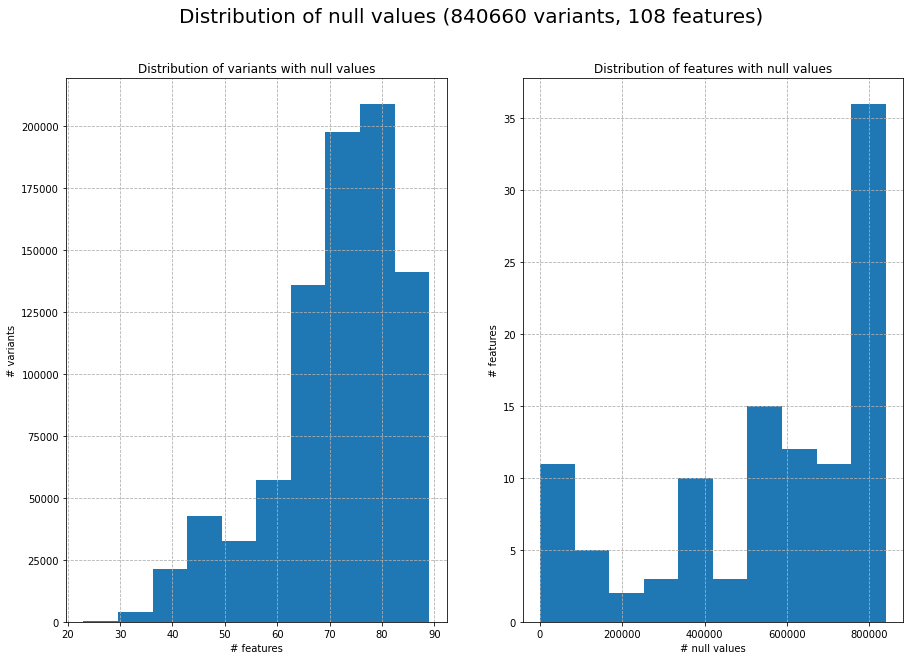

In [123]:
fig, [ax_var, ax_fts] = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Distribution of null values (840660 variants, 108 features)", fontsize=20)

#fig, ax = plt.subplots(figsize=(9, 8))
ax_var.set_title("Distribution of variants with null values")
#ax.plot(50, y, '--')
ax_var.set_xlabel('# features')
ax_var.set_ylabel('# variants')
ax_var.grid(linestyle="--")
ax_var.hist(X_train.isnull().sum(axis = 1))

#fig, ax = plt.subplots(figsize=(9, 8))
ax_fts.set_title("Distribution of features with null values")
#ax.plot(50, y, '--')
ax_fts.set_xlabel('# null values')
ax_fts.set_ylabel('# features')
ax_fts.grid(linestyle="--")
ax_fts.hist(X_train.isnull().sum(axis = 0))

#fig.tight_layout()
#for container in ax_var.containers:
#    ax_var.bar_label(container)
plt.show()


#fig.tight_layout()
#for container in ax_fts.containers:
#    ax_fts.bar_label(container)
#plt.show()

In [124]:
median_scores = X_train.median().to_dict()
median_scores

/scratch/local/ipykernel_169486/2279231684.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_scores = X_train.median().to_dict()


{'aloft.tolerant': 0.03195,
 'aloft.recessive': 0.5445,
 'aloft.dominant': 0.3846,
 'cadd.phred': 9.158,
 'chasmplus.score': 0.073,
 'chasmplus.pval': 0.277,
 'civic.molecular_profile_score': 7.5,
 'cosmic.variant_count': 1.0,
 'cosmic_gene.occurrences': 1726.0,
 'cscape.score': 0.437311,
 'cancer_genome_interpreter.resistant': 0.0,
 'cancer_genome_interpreter.responsive': 1.0,
 'cancer_genome_interpreter.other': 0.0,
 'clinpred.score': 0.111,
 'dann.score': 0.6542089049693963,
 'dann_coding.dann_coding_score': 0.9943064605452162,
 'dgi.score': 3.55,
 'ess_gene.indispensability_score': 0.864377222503323,
 'exac_gene.exac_pli': 0.0599265597352726,
 'exac_gene.exac_pnull': 1.01366553213123e-05,
 'exac_gene.exac_del_score': 0.244988743340227,
 'exac_gene.exac_dup_score': 0.189100654118317,
 'exac_gene.exac_cnv_score': 0.034861123316654,
 'fathmm.fathmm_score': -1.56,
 'fathmm_xf_coding.fathmm_xf_coding_score': 0.344734,
 'funseq2.score': 0.498146534129084,
 'gerp.gerp_rs': 4.67,
 'ghis.gh

In [125]:
#Fill NAs in dataframe
X_train['gnomad3.af'] = X_train['gnomad3.af'].fillna(0)
X_train = X_train.fillna(X_train.median())

/scratch/local/ipykernel_169486/430676110.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train = X_train.fillna(X_train.median())


In [126]:
list(config_dict["dummies_sep"].keys())

['gtex.gtex_tissue',
 'dgi.interaction',
 'cgd.inheritance',
 'so',
 'repeat.repeatclass',
 'genehancer.feature_name',
 'cgc.inheritance',
 'cgc.class']

In [127]:
#Perform one-hot encoding using sep
for key in tqdm(config_dict["dummies_sep"]):
    X_train = pd.concat((X_train , X_train[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)

X_train.shape

100%|██████████| 8/8 [00:28<00:00,  3.57s/it]


(840660, 228)

In [128]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

coding                                     187883
aloft.tolerant                                  0
aloft.recessive                                 0
aloft.dominant                                  0
aloft.pred                                 828603
aloft.conf                                 828603
cadd.phred                                      0
cgd.inheritance                            663181
chasmplus.score                                 0
chasmplus.pval                                  0
civic.molecular_profile_score                   0
cosmic.variant_count                            0
cosmic_gene.occurrences                         0
cscape.score                                    0
cgc.class                                  532422
cgc.inheritance                            530025
cancer_genome_interpreter.resistant             0
cancer_genome_interpreter.responsive            0
cancer_genome_interpreter.other                 0
ccre_screen._group                         690335


In [129]:
X_train = X_train.drop(list(config_dict["dummies_sep"].keys()), axis=1)
print('\nVariant-transcript pairs shape =', X_train.shape)
#print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (840660, 220)


In [130]:
#Perform one-hot encoding
X_train = pd.get_dummies(X_train, prefix_sep='_')
print('\nVariant-transcript pairs shape =', X_train.shape)
#print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (840660, 240)


In [131]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

aloft.tolerant                                              0
aloft.recessive                                             0
aloft.dominant                                              0
cadd.phred                                                  0
chasmplus.score                                             0
chasmplus.pval                                              0
civic.molecular_profile_score                               0
cosmic.variant_count                                        0
cosmic_gene.occurrences                                     0
cscape.score                                                0
cancer_genome_interpreter.resistant                         0
cancer_genome_interpreter.responsive                        0
cancer_genome_interpreter.other                             0
clinpred.score                                              0
dann.score                                                  0
dann_coding.dann_coding_score                               0
dgi.scor

In [66]:
#X_train = X_train.drop('mitomap.status', axis=1)

<AxesSubplot:>

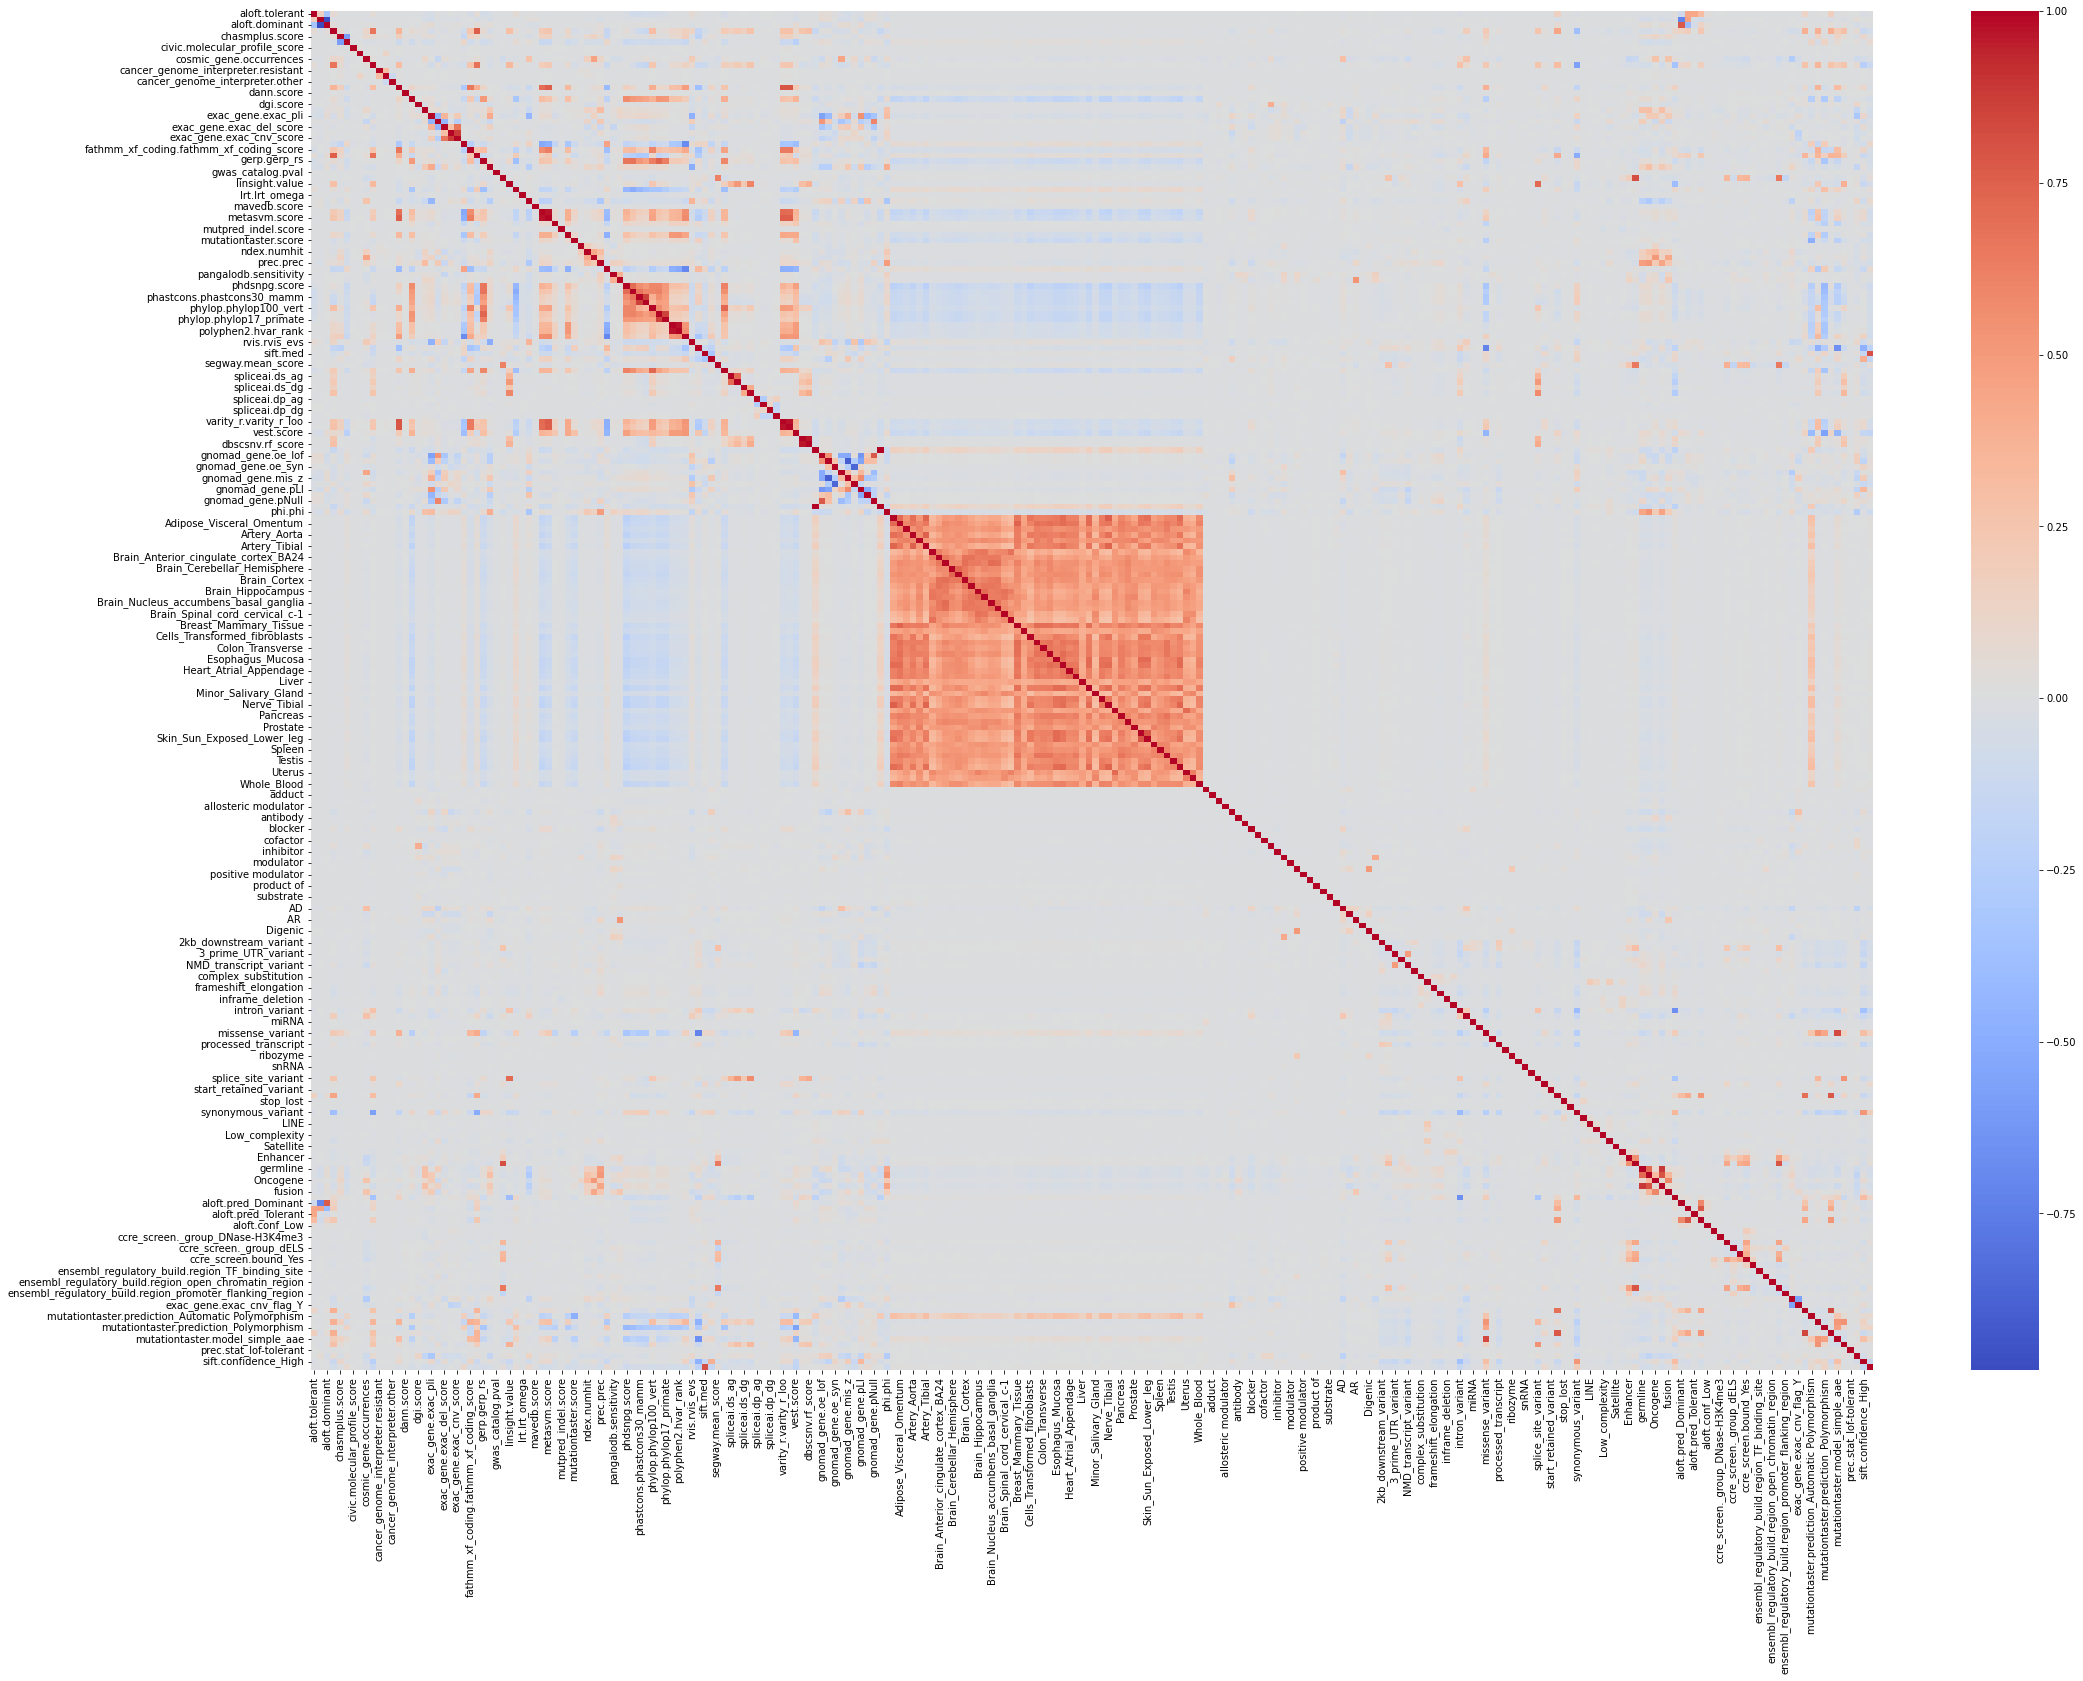

In [132]:
fig = plt.figure(figsize=(35, 25))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, fmt=".2g", cmap="coolwarm")

In [133]:
# Create correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(
            np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)
        )



/scratch/local/ipykernel_169486/1278552867.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)


In [134]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
print(
            f"Correlated columns to be dropped: {to_drop}"
        )



6
Correlated columns to be dropped: ['aloft.dominant', 'metasvm.score', 'polyphen2.hvar_rank', 'varity_r.varity_er_loo', 'dbscsnv.rf_score', 'gnomad3.af']


<AxesSubplot:>

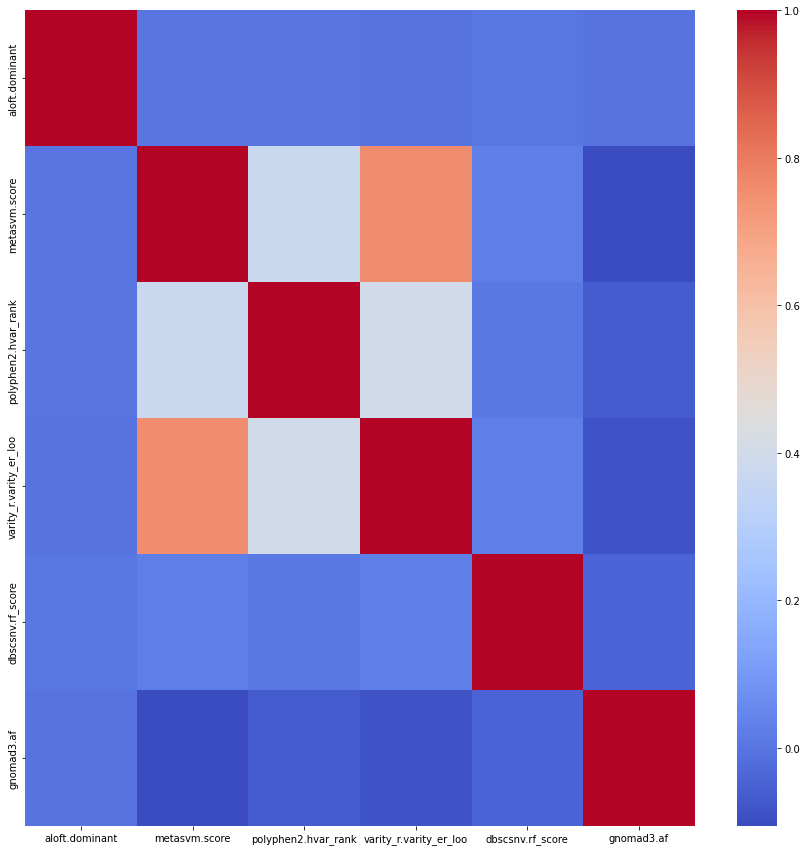

In [135]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(X_train[to_drop].corr(), fmt=".2g", cmap="coolwarm")

In [136]:
# Drop features
#df.drop(to_drop, axis=1, inplace=True)
X_train = X_train.reset_index(drop=True)
del corr_matrix, to_drop, upper, corr_matrix_abs

In [137]:
X_train.shape

(840660, 240)

In [138]:
#fig = plt.figure(figsize=(30,20))
#sns.heatmap(X_train.corr(), fmt=".2g", cmap="coolwarm")

In [139]:
#Give variant IDs and add the variant info columns
#df = df.reset_index(drop=True)
#df['ID'] = [f'var_{num}' for num in range(len(df))]
#print('NAs filled!')
X_train = pd.concat([var.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
del var

In [140]:
print('\nVariant-transcript pairs shape =', X_train.shape)
print('\nVariants shape =', X_train[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (840660, 255)

Variants shape = (178544, 4)


In [141]:
train_columns = X_train.columns.values.tolist()
print(train_columns)

['transcript', 'gene', 'consequence', 'protein_hgvs', 'cdna_hgvs', 'chrom', 'pos', 'ref_base', 'alt_base', 'clingen.disease', 'clingen.classification', 'ncbigene.entrez', 'omim.omim_id', 'uniprot.acc', 'dbsnp.rsid', 'aloft.tolerant', 'aloft.recessive', 'aloft.dominant', 'cadd.phred', 'chasmplus.score', 'chasmplus.pval', 'civic.molecular_profile_score', 'cosmic.variant_count', 'cosmic_gene.occurrences', 'cscape.score', 'cancer_genome_interpreter.resistant', 'cancer_genome_interpreter.responsive', 'cancer_genome_interpreter.other', 'clinpred.score', 'dann.score', 'dann_coding.dann_coding_score', 'dgi.score', 'ess_gene.indispensability_score', 'exac_gene.exac_pli', 'exac_gene.exac_pnull', 'exac_gene.exac_del_score', 'exac_gene.exac_dup_score', 'exac_gene.exac_cnv_score', 'fathmm.fathmm_score', 'fathmm_xf_coding.fathmm_xf_coding_score', 'funseq2.score', 'gerp.gerp_rs', 'ghis.ghis', 'gwas_catalog.pval', 'genehancer.score', 'linsight.value', 'lrt.lrt_score', 'lrt.lrt_omega', 'loftool.loftool

In [142]:
print('\nData shape (After filtering) =', X_train.shape)
print('Class shape=', y_train.shape)


Data shape (After filtering) = (840660, 255)
Class shape= (840660,)


In [143]:
# Write it to a file
X_train.to_csv('./processed/train_data_3_star/train_data_80.csv.gz', index=False)
y_train.to_csv('./processed/train_data_3_star/train_data-y_80.csv.gz', index=False)

# Preparing Testing data

In [146]:
print('\nImpact (Class):\n', y_test.value_counts())


Impact (Class):
 low_impact     149619
high_impact     60547
Name: class, dtype: int64


In [147]:
# Drop variant info columns so we can perform one-hot encoding
var = X_test[config_dict['train_cols']]
X_test = X_test.drop(config_dict['train_cols'], axis=1)

In [148]:
# Double check if there are any columns with weird formatting as categorical before performing one-hot encoding
num_cols = X_test._get_numeric_data().columns

list(set(X_test.columns) - set(num_cols))

['so',
 'aloft.conf',
 'sift.confidence',
 'cgd.inheritance',
 'mutationtaster.model',
 'dgi.interaction',
 'mutationtaster.prediction',
 'coding',
 'cgc.inheritance',
 'cgc.class',
 'genehancer.feature_name',
 'gtex.gtex_tissue',
 'aloft.pred',
 'ccre_screen.bound',
 'prec.stat',
 'ccre_screen._group',
 'ensembl_regulatory_build.region',
 'repeat.repeatclass',
 'exac_gene.exac_cnv_flag']

In [149]:
X_test.shape

(210166, 108)

In [150]:
#Perform one-hot encoding
for key in tqdm(config_dict["dummies_sep"]):
    X_test = pd.concat((X_test , X_test[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
X_test = X_test.drop(list(config_dict["dummies_sep"].keys()), axis=1)
X_test = pd.get_dummies(X_test, prefix_sep='_')
X_test.shape

100%|██████████| 8/8 [00:07<00:00,  1.09it/s]


(210166, 237)

In [151]:
X_test['gnomad3.af'] = X_test['gnomad3.af'].fillna(0)

In [152]:
for key in tqdm(median_scores.keys()):
            if key in X_test.columns:
                X_test[key] = (
                    X_test[key]
                    .fillna(median_scores[key])
                    .astype("float64")
                )

100%|██████████| 89/89 [00:00<00:00, 467.60it/s]


In [153]:
X_test.columns

Index(['aloft.tolerant', 'aloft.recessive', 'aloft.dominant', 'cadd.phred',
       'chasmplus.score', 'chasmplus.pval', 'civic.molecular_profile_score',
       'cosmic.variant_count', 'cosmic_gene.occurrences', 'cscape.score',
       ...
       'mutationtaster.prediction_Automatic Polymorphism',
       'mutationtaster.prediction_Damaging',
       'mutationtaster.prediction_Polymorphism',
       'mutationtaster.model_complex_aae', 'mutationtaster.model_simple_aae',
       'mutationtaster.model_without_aae', 'prec.stat_lof-tolerant',
       'prec.stat_recessive', 'sift.confidence_High', 'sift.confidence_Low'],
      dtype='object', length=237)

In [154]:
df2 = pd.DataFrame()
for key in tqdm(train_columns):
            if key in X_test.columns:
                df2[key] = X_test[key]
            else:
                df2[key] = 0

  0%|          | 0/255 [00:00<?, ?it/s]/scratch/local/ipykernel_169486/2763186993.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[key] = X_test[key]
 45%|████▌     | 115/255 [00:00<00:00, 1143.29it/s]/scratch/local/ipykernel_169486/2763186993.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[key] = 0
100%|██████████| 255/255 [00:00<00:00, 1045.49it/s]


In [155]:
print('\nData shape =', X_test.shape)
print('\nData shape =', df2.shape)


Data shape = (210166, 237)

Data shape = (210166, 255)


In [156]:
X_test = df2.copy()
del df2

In [157]:
# Check how many columns are null
X_test.isnull().sum(axis = 0)

transcript                                                  210166
gene                                                        210166
consequence                                                 210166
protein_hgvs                                                210166
cdna_hgvs                                                   210166
chrom                                                       210166
pos                                                         210166
ref_base                                                    210166
alt_base                                                    210166
clingen.disease                                             210166
clingen.classification                                      210166
ncbigene.entrez                                             210166
omim.omim_id                                                210166
uniprot.acc                                                 210166
dbsnp.rsid                                                  21

In [158]:
X_test = X_test.drop(config_dict['train_cols'], axis=1)

In [159]:
print('\nData shape =', X_test.shape)


Data shape = (210166, 240)


In [160]:
X_test.shape[0] == var.shape[0]

True

In [161]:
X_test = pd.concat([var.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

In [162]:
# Check how many columns are null
X_test.isnull().sum(axis = 0)

transcript                                                       0
gene                                                             0
consequence                                                      0
protein_hgvs                                                 98200
cdna_hgvs                                                    27329
chrom                                                            0
pos                                                              0
ref_base                                                         0
alt_base                                                         0
clingen.disease                                              87277
clingen.classification                                       87277
ncbigene.entrez                                                438
omim.omim_id                                                169754
uniprot.acc                                                     75
dbsnp.rsid                                                   1

In [163]:
print('\nVariant-transcript pairs shape =', X_test.shape)
print('\nVariants shape =', X_test[['chrom','pos','ref_base','alt_base']].drop_duplicates().shape)


Variant-transcript pairs shape = (210166, 255)

Variants shape = (106343, 4)


In [164]:
print('\nData shape =', X_test.shape)
print('\nClass shape =', y_test.shape)


Data shape = (210166, 255)

Class shape = (210166,)


In [165]:
# Write it to a file
X_test.to_csv('./processed/train_data_3_star/test_data_20.csv.gz', index=False)
y_test.to_csv('./processed/train_data_3_star/test_data-y_20.csv.gz', index=False)

In [166]:
del X_train, X_test, df

In [167]:
df = original.copy()

In [60]:
benchmark_columns = ['chrom','pos','ref_base','alt_base','transcript','cadd.phred','cscape.score','clinpred.score','dann.score','dann_coding.dann_coding_score','dgi.score','fathmm_xf_coding.fathmm_xf_coding_score','funseq2.score','linsight.value','lrt.lrt_score','loftool.loftool_score','metasvm.score','metalr.score','mutpred1.mutpred_general_score','mutpred_indel.score','mutation_assessor.score','mutationtaster.score','provean.score','phdsnpg.score','revel.score','sift.score','vest.score','dbscsnv.ada_score','dbscsnv.rf_score','clinvar.sig']
benchmark_df = df[benchmark_columns]
benchmark_df.columns = ['chrom','pos','ref_base','alt_base','transcript','CADD','Cscape','Clinpred','DANN','DANN_coding','DGI','fathmm_xf','funseq2','linsight','LRT','loftool','MetaSVM','MetaLR','Mutpred','Mutpred_indel','Mutation_assessor','Mutationtaster','Provean','phdsnpg','revel','SIFT','VEST','dbscsnv.ada_score','dbscsnv.rf_score','Clinvar']
benchmark_df.head()

,chrom,pos,ref_base,alt_base,transcript,CADD,Cscape,Clinpred,DANN,DANN_coding,...,Mutation_assessor,Mutationtaster,Provean,phdsnpg,revel,SIFT,VEST,dbscsnv.ada_score,dbscsnv.rf_score,Clinvar
0,chr1,69134,A,G,ENST00000335137,16.91,0.480042,0.004,0.957771,0.957771,...,1.54,0.998383,-3.56,0.133,0.075,0.107,0.107,NaN,NaN,NaN
1,chr1,69134,A,G,ENST00000641515,16.91,0.480042,0.004,0.957771,0.957771,...,NaN,0.998383,NaN,0.133,0.075,NaN,NaN,NaN,NaN,NaN
2,chr1,69581,C,G,ENST00000335137,23.40,0.279863,0.998,0.996460,0.996460,...,3.13,0.992433,-8.33,0.698,0.079,0.000,0.431,NaN,NaN,NaN
3,chr1,69581,C,G,ENST00000641515,23.40,0.279863,0.998,0.996460,0.996460,...,NaN,0.992433,NaN,0.698,0.079,NaN,NaN,NaN,NaN,NaN
4,chr1,69682,G,A,ENST00000335137,20.80,0.329402,0.161,0.996149,0.996149,...,0.84,1.000000,0.13,0.025,0.112,0.186,0.073,NaN,NaN,NaN


In [61]:
benchmark_df.shape

(12941392, 30)

In [62]:
# Write it to a file
benchmark_df.to_csv('./processed/train_data_3_star_DExTR/benchmark_data.csv.gz', index=False)

In [165]:
original.so.head()

0    missense_variant
2    missense_variant
4    missense_variant
6    missense_variant
8    missense_variant
Name: so, dtype: object

In [175]:
def test_parsing(dataframe, config_dict):
    # Drop variant info columns so we can perform one-hot encoding
    var = dataframe[config_dict['id_cols']]
    dataframe = dataframe.drop(config_dict['id_cols'], axis=1)
    #dataframe = dataframe.replace(['.','-'], np.nan)
    
    #Perform one-hot encoding
    for key in tqdm(config_dict["dummies_sep"]):
        dataframe = pd.concat((dataframe , dataframe[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
    dataframe = dataframe.drop(list(config_dict["dummies_sep"].keys()), axis=1)
    dataframe = pd.get_dummies(dataframe, prefix_sep='_')
    
    for key in tqdm(list(config_dict['median_scores'].keys())):
            if key in dataframe.columns:
                dataframe[key] = (
                    dataframe[key]
                    .fillna(config_dict['median_scores'][key])
                    .astype("float64")
                )
                
    df2 = pd.DataFrame()
    for key in tqdm(config_dict["filtered_cols"]):
            if key in dataframe.columns:
                df2[key] = dataframe[key]
            else:
                df2[key] = 0
    del dataframe
              
    df2 = df2.drop(config_dict['id_cols'], axis=1)
    df2 = pd.concat([var.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
    return df2


In [176]:
len(config_dict["filtered_cols"])

294

In [185]:
df2 = test_parsing(original, config_dict)
print('\nData shape =', df2.shape)
# Write it to a file
df2.to_csv('./processed/clinvar_filtered.csv.gz', index=False)

100%|██████████| 294/294 [00:53<00:00,  5.46it/s]



Data shape = (10695155, 293)


In [186]:
list(set(df2.columns) - set(config_dict["filtered_cols"]))

[]